# Airline Arrivals Project



Use this dataset of airline arrival information to predict how late flights
will be. A flight only counts as late if it is more than 30 minutes late.


1. The project should follow guideline as previous projects.
2. Apply models in Naïve Bayes, Logistic Regression, Decision
Tree, Random Forest, Gradient Boosting and SVM.
3. Apply PCA, SelectKBest and RFE for feature selections.
4. Using gridsearchCV to obtain best parameters for models.
5. Compare performances among models, write up analysis
why the model is good or bad in the algorithmic approach
(explain why the algorithm is good or bad for the dataset
structure, can you do something to improve the model?)
6. Include the conclusions.




## 1. Data pre-processing
### 1.1 Importing Various Modules

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for plotting graphs
%matplotlib inline
import numpy as np
import sklearn
import time
# Import model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### 1.2 Reading the data from a CSV file


In [23]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("2008.csv")
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


**Variable descriptions
    Name	Description
    1	Year	1987-2008
    2	Month	1-12
    3	DayofMonth	1-31
    4	DayOfWeek	1 (Monday) - 7 (Sunday)
    5	DepTime	actual departure time (local, hhmm)
    6	CRSDepTime	scheduled departure time (local, hhmm)
    7	ArrTime	actual arrival time (local, hhmm)
    8	CRSArrTime	scheduled arrival time (local, hhmm)
    9	UniqueCarrier	unique carrier code
    10	FlightNum	flight number
    11	TailNum	plane tail number
    12	ActualElapsedTime	in minutes
    13	CRSElapsedTime	in minutes
    14	AirTime	in minutes
    15	ArrDelay	arrival delay, in minutes
    16	DepDelay	departure delay, in minutes
    17	Origin	origin IATA airport code
    18	Dest	destination IATA airport code
    19	Distance	in miles
    20	TaxiIn	taxi in time, in minutes
    21	TaxiOut	taxi out time in minutes
    22	Cancelled	was the flight cancelled?
    23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
    24	Diverted	1 = yes, 0 = no
    25	CarrierDelay	in minutes
    26	WeatherDelay	in minutes
    27	NASDelay	in minutes
    28	SecurityDelay	in minutes
    29	LateAircraftDelay	in minutes

In [24]:
data.shape

(7009728, 29)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [26]:
# Identify object columns
print(data.select_dtypes(['object']).columns)

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'], dtype='object')


### 1.3 Check missing values

In [27]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.943670
CRSDepTime            0.000000
ArrTime               2.163408
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.189276
ActualElapsedTime     2.206919
CRSElapsedTime        0.012040
AirTime               2.206919
ArrDelay              2.206919
DepDelay              1.943670
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.163408
TaxiOut               1.955254
Cancelled             0.000000
CancellationCode     98.039382
Diverted              0.000000
CarrierDelay         78.248300
WeatherDelay         78.248300
NASDelay             78.248300
SecurityDelay        78.248300
LateAircraftDelay    78.248300
dtype: float64

**CancellationCode  CarrierDelay  WeatherDelay  NASDelay   SecurityDelay   LateAircraftDelay   are over 70%  -> drop these columns
** The other missing value is around 2% -> small amount -> removed these row data

In [28]:
data = data.drop(['CancellationCode','CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
data = data.dropna()


#### We call CarrierDelay  WeatherDelay  NASDelay   SecurityDelay   LateAircraftDelay are Other_delay

In [29]:
data['other_delay'] = data['ActualElapsedTime'] - data['AirTime'] - data['ArrDelay'] - data['DepDelay']

In [30]:
data.shape

(6855024, 24)

In [31]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,6855024.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,6855024.0,6.388525,3.398833,1.0,3.0,6.0,9.0,12.0
DayofMonth,6855024.0,15.738256,8.801085,1.0,8.0,16.0,23.0,31.0
DayOfWeek,6855024.0,3.925802,1.988459,1.0,2.0,4.0,6.0,7.0
DepTime,6855024.0,1333.775377,478.057428,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,6855024.0,1325.037351,464.313019,0.0,925.0,1317.0,1715.0,2359.0
ArrTime,6855024.0,1481.265468,505.132240,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,6855024.0,1493.714769,482.664252,0.0,1115.0,1515.0,1905.0,2359.0
FlightNum,6855024.0,2212.505007,1956.435438,1.0,618.0,1563.0,3494.0,9741.0
ActualElapsedTime,6855024.0,127.322441,70.187326,12.0,77.0,110.0,157.0,1379.0


#### Cancelled	& Diverted	 are 0 -> drop them

In [39]:
data = data.drop(['Year','Cancelled','Diverted'], axis=1)


KeyError: "['Year' 'Cancelled' 'Diverted'] not found in axis"

### 1.4 Data exploration

### CORRELATION

Text(0.5, 1, 'Variable Correlation')

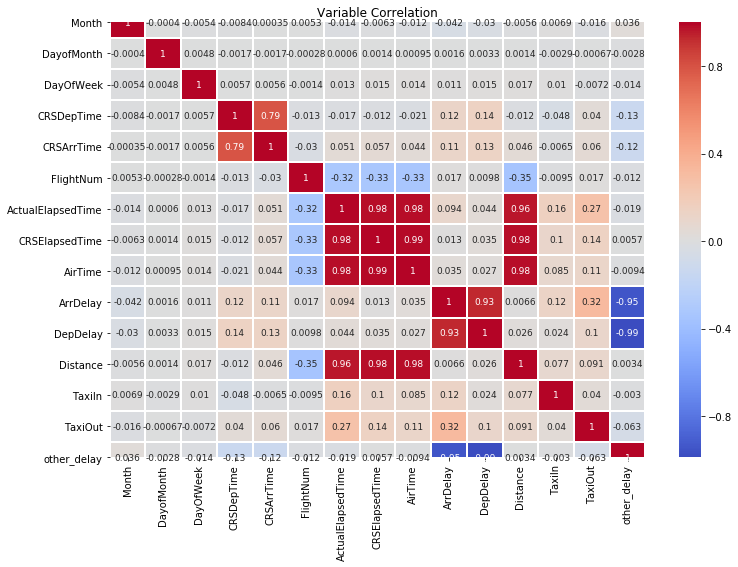

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

 DepTime & CRSDepTime   , ArrTime & CRSArrTime have high correlation score we should drop one of them 
 
 

In [33]:
# Instead We create a DEPARTURE_DELAY  and ARRIVAL_DELAY 
# data['DEPARTURE_DELAY'] = data['DepTime'] - data['CRSDepTime']
# data['ARRIVAL_DELAY'] = data['ArrTime'] - data['CRSArrTime']

In [34]:
# Drop DepTime & ArrTime
data = data.drop(['DepTime','ArrTime'], axis=1)


In [41]:
# AirTime & Distance
#Drop AirTime
data = data.drop(['AirTime'], axis=1)

#### ActualElapsedTime	CRSElapsedTime have high correlation score we should drop one of them
#### Instead We create a Flight_DELAY lable 'isDelayed' = CRSElapsedTime -  ActualElapsedTime	 
####                                                                Delay ( >  30 mins ) : 1
####                                                                Not delay    :0
#### Then drop CRSElapsedTime & ActualElapsedTime

In [59]:
data['isDelayed'] = (data['CRSElapsedTime'] - data['ActualElapsedTime'])

In [60]:
data['isDelayed'] = data['isDelayed'].apply(lambda x: 1 if x > 30 else 0)

In [61]:

data['isDelayed'].describe()

count    6.855024e+06
mean     7.869265e-03
std      8.835916e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isDelayed, dtype: float64

In [63]:
data = data.drop(['CRSElapsedTime', 'ActualElapsedTime'], axis=1)

### TaxiIn & TaxiOut seems that doesn't affect to the flight so that we remove them

In [64]:
data = data.drop(['TaxiIn', 'TaxiOut'], axis=1)

### CRSDepTime is varied  from 0000 - 2400  so that we group them to DepTime_lb every 2 hour them drop CRSDepTime & DepTime

In [94]:
data['DepTime_lb'] = data['CRSDepTime'];
data['DepTime_lb']=np.where( (data['DepTime_lb'] >= 0) & ( data['DepTime_lb'] <= 200 ) , 2, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 200) & ( data['DepTime_lb'] <= 400 ) , 4, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 400) & ( data['DepTime_lb'] <= 600 ) , 6, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 600) & ( data['DepTime_lb'] <= 800 ) , 8, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 800) & ( data['DepTime_lb'] <= 1000 ) , 10, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1000) & ( data['DepTime_lb'] <= 1200 ) , 12, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1200) & ( data['DepTime_lb'] <= 1400 ) , 14, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1400) & ( data['DepTime_lb'] <= 1600 ) , 16, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1600) & ( data['DepTime_lb'] <= 1800 ) , 18, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1800) & ( data['DepTime_lb'] <= 2000 ) , 20, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 2000) & ( data['DepTime_lb'] <= 2200 ) , 22, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 2200) & ( data['DepTime_lb'] <= 2400 ) , 24, data['DepTime_lb'] )

data['DepTime_lb'] = data['DepTime_lb'] .astype('object') 

data['DepTime_lb']=np.where( (data['DepTime_lb'] == 2) , '0_2', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 4) , '2_4', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 6) , '4_6', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 8) , '6_8', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 10) , '8_10', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 12) , '10_12', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 14) , '12_14', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 16) , '14_16', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 18) , '16_18', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 20) , '18_20', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 22) , '20_22', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 24) , '22_24', data['DepTime_lb'] )

In [95]:
data['DepTime_lb'].unique()


array(['18_20', '6_8', '8_10', '16_18', '10_12', '14_16', '12_14',
       '20_22', '4_6', '22_24', '0_2', '2_4'], dtype=object)

In [98]:
data = data.drop(['CRSDepTime'], axis=1)

In [99]:
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'other_delay', 'y', 'isDelayed', 'DepTime_lb'],
      dtype='object')

### Convert CRSArrTime  label like DepTime_lb does

In [100]:

data['CRSArrTime']=np.where( (data['CRSArrTime'] >= 0) & ( data['CRSArrTime'] <= 200 ) , 2, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 200) & ( data['CRSArrTime'] <= 400 ) , 4, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 400) & ( data['CRSArrTime'] <= 600 ) , 6, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 600) & ( data['CRSArrTime'] <= 800 ) , 8, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 800) & ( data['CRSArrTime'] <= 1000 ) , 10, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1000) & ( data['CRSArrTime'] <= 1200 ) , 12, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1200) & ( data['CRSArrTime'] <= 1400 ) , 14, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1400) & ( data['CRSArrTime'] <= 1600 ) , 16, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1600) & ( data['CRSArrTime'] <= 1800 ) , 18, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1800) & ( data['CRSArrTime'] <= 2000 ) , 20, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 2000) & ( data['CRSArrTime'] <= 2200 ) , 22, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 2200) & ( data['CRSArrTime'] <= 2400 ) , 24, data['CRSArrTime'] )

data['CRSArrTime'] = data['CRSArrTime'] .astype('object') 

data['CRSArrTime']=np.where( (data['CRSArrTime'] == 2) , '0_2', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 4) , '2_4', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 6) , '4_6', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 8) , '6_8', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 10) , '8_10', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 12) , '10_12', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 14) , '12_14', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 16) , '14_16', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 18) , '16_18', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 20) , '18_20', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 22) , '20_22', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 24) , '22_24', data['CRSArrTime'] )

In [101]:
data['CRSArrTime'].unique()


array(['22_24', '8_10', '6_8', '10_12', '18_20', '20_22', '16_18',
       '14_16', '12_14', '0_2', '4_6', '2_4'], dtype=object)

## Numeric Features


In [102]:
data.select_dtypes(['float64','int64']).columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'ArrDelay', 'DepDelay',
       'Distance', 'other_delay', 'y', 'isDelayed'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACC5F1EA08>,
      dtype=object)

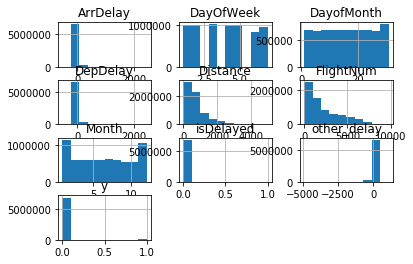

In [103]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = data, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()